In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

In [5]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [6]:
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
clf.C = 1.0
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.95614035087719296

In [8]:
clf.C = 100.0
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.97368421052631582

In [9]:
C_range = [1e-5, 1e-3, 1e-2, 1, 1e2, 1e5, 1e10]

In [10]:
C_range_exp = np.arange(-15.0, 21.0)
C_range = 10 ** C_range_exp
C_range_exp

array([-15., -14., -13., -12., -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,
        -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,
         7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,
        18.,  19.,  20.])

In [11]:
C_range

array([  1.00000000e-15,   1.00000000e-14,   1.00000000e-13,
         1.00000000e-12,   1.00000000e-11,   1.00000000e-10,
         1.00000000e-09,   1.00000000e-08,   1.00000000e-07,
         1.00000000e-06,   1.00000000e-05,   1.00000000e-04,
         1.00000000e-03,   1.00000000e-02,   1.00000000e-01,
         1.00000000e+00,   1.00000000e+01,   1.00000000e+02,
         1.00000000e+03,   1.00000000e+04,   1.00000000e+05,
         1.00000000e+06,   1.00000000e+07,   1.00000000e+08,
         1.00000000e+09,   1.00000000e+10,   1.00000000e+11,
         1.00000000e+12,   1.00000000e+13,   1.00000000e+14,
         1.00000000e+15,   1.00000000e+16,   1.00000000e+17,
         1.00000000e+18,   1.00000000e+19,   1.00000000e+20])

In [12]:
from sklearn.model_selection import GridSearchCV

param = {'C':C_range} # clf.C ディクショナリを用いて探索したいパラメータを指定する．

gs = GridSearchCV(estimator=clf, param_grid=param) # default の cv=None だと　3-fold cross validation
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-15,   1.00000e-14,   1.00000e-13,   1.00000e-12,
         1.00000e-11,   1.00000e-10,   1.00000e-09,   1.00000e-08,
         1.00000e-07,   1.00000e-06,   1.00000e-05,   1.00000e-04,
         1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.0000...,   1.00000e+15,   1.00000e+16,
         1.00000e+17,   1.00000e+18,   1.00000e+19,   1.00000e+20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [13]:
gs.cv_results_

/Users/yohei/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/yohei/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/yohei/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings

{'mean_fit_time': array([ 0.00089208,  0.00076   ,  0.00056934,  0.0007774 ,  0.00058961,
         0.000585  ,  0.00056044,  0.00051125,  0.00053406,  0.0007271 ,
         0.00072972,  0.00064373,  0.00071144,  0.00069531,  0.00087762,
         0.00148996,  0.00233372,  0.00304874,  0.00436346,  0.00592351,
         0.00523901,  0.00814597,  0.01113637,  0.01238163,  0.01224335,
         0.01198896,  0.01230844,  0.01078574,  0.00846434,  0.01103687,
         0.00964729,  0.01046594,  0.00871038,  0.00838677,  0.0110418 ,
         0.01197505]),
 'mean_score_time': array([ 0.00030835,  0.00027331,  0.00026552,  0.00025884,  0.0002377 ,
         0.00024533,  0.0002319 ,  0.00020305,  0.00020933,  0.0002292 ,
         0.000247  ,  0.00020528,  0.00020099,  0.00020059,  0.00021736,
         0.00034952,  0.00049114,  0.00056219,  0.00038107,  0.00042693,
         0.00041199,  0.00026234,  0.00022435,  0.00027363,  0.000235  ,
         0.00021633,  0.00022364,  0.00017619,  0.0001773 ,  0.00

In [14]:
# DataFrame にすると見やすい．
import pandas as pd

pd.DataFrame(gs.cv_results_)

/Users/yohei/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/yohei/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/yohei/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.000892,0.000308,0.641758,0.640662,1e-15,{'C': 1e-15},25,0.638158,0.640264,0.644737,0.643564,0.642384,0.638158,0.000273,6.921598e-05,0.002725,0.002225
1,0.000760,0.000273,0.641758,0.640662,1e-14,{'C': 1e-14},25,0.638158,0.640264,0.644737,0.643564,0.642384,0.638158,0.000205,2.545787e-05,0.002725,0.002225
2,0.000569,0.000266,0.641758,0.640662,1e-13,{'C': 1e-13},25,0.638158,0.640264,0.644737,0.643564,0.642384,0.638158,0.000022,5.870855e-05,0.002725,0.002225
3,0.000777,0.000259,0.641758,0.640662,1e-12,{'C': 1e-12},25,0.638158,0.640264,0.644737,0.643564,0.642384,0.638158,0.000242,2.341066e-05,0.002725,0.002225
4,0.000590,0.000238,0.641758,0.640662,1e-11,{'C': 1e-11},25,0.638158,0.640264,0.644737,0.643564,0.642384,0.638158,0.000020,1.752336e-05,0.002725,0.002225
5,0.000585,0.000245,0.641758,0.640662,1e-10,{'C': 1e-10},25,0.638158,0.640264,0.644737,0.643564,0.642384,0.638158,0.000027,3.315133e-05,0.002725,0.002225
6,0.000560,0.000232,0.641758,0.640662,1e-09,{'C': 1e-09},25,0.638158,0.640264,0.644737,0.643564,0.642384,0.638158,0.000017,2.190541e-05,0.002725,0.002225
7,0.000511,0.000203,0.641758,0.640662,1e-08,{'C': 1e-08},25,0.638158,0.640264,0.644737,0.643564,0.642384,0.638158,0.000005,8.778064e-07,0.002725,0.002225
8,0.000534,0.000209,0.641758,0.640662,1e-07,{'C': 1e-07},25,0.638158,0.640264,0.644737,0.643564,0.642384,0.638158,0.000017,4.577802e-06,0.002725,0.002225
9,0.000727,0.000229,0.641758,0.640662,1e-06,{'C': 1e-06},25,0.638158,0.640264,0.644737,0.643564,0.642384,0.638158,0.000159,2.281217e-05,0.002725,0.002225


In [15]:
gs.best_params_, gs.best_score_, gs.best_estimator_

({'C': 10.0},
 0.96703296703296704,
 LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False))

`best_score_`は訓練セットに対する交差検証の平均交差検証精度である．

つまり，テストデータを用いたスコアではない．

In [16]:
clf_best = gs.best_estimator_
# clf_best.fit(X_train, y_train) # training of classifier　，すでにこの行のコードはgs.fit(...)の際に行なっている．
clf_best.score(X_test, y_test)

0.96491228070175439

In [17]:
# gs.fit(X_train, y_train) # grid search, and training classifier ,
#gs.fit(...)とすると一番良いパラメータを見つけ，さらに一番良いパラメータで訓練データ全てを使って学習してくれている．
gs.score(X_test, y_test)

0.96491228070175439

gs.score(...)とgs.best_estimator_.score(X_test, y_test)はやっていることは等しい
詳しいことは

[Pythonではじめる機械学習 ―scikit-learnで学ぶ特徴量エンジニアリングと機械学習の基礎](https://www.amazon.co.jp/Python%E3%81%A7%E3%81%AF%E3%81%98%E3%82%81%E3%82%8B%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92-scikit-learn%E3%81%A7%E5%AD%A6%E3%81%B6%E7%89%B9%E5%BE%B4%E9%87%8F%E3%82%A8%E3%83%B3%E3%82%B8%E3%83%8B%E3%82%A2%E3%83%AA%E3%83%B3%E3%82%B0%E3%81%A8%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%81%AE%E5%9F%BA%E7%A4%8E-Andreas-C-Muller/dp/4873117984/ref=sr_1_1?ie=UTF8&qid=1504848460&sr=8-1&keywords=python%E3%81%A7%E3%81%AF%E3%81%98%E3%82%81%E3%82%8B%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92)
のP261-262参照

In [18]:
gs.cv_results_['param_C'] # masked_array が返ってくる

masked_array(data = [1.0000000000000001e-15 1e-14 1e-13 9.9999999999999998e-13
 9.9999999999999994e-12 1e-10 1.0000000000000001e-09 1e-08
 9.9999999999999995e-08 9.9999999999999995e-07 1.0000000000000001e-05
 0.0001 0.001 0.01 0.10000000000000001 1.0 10.0 100.0 1000.0 10000.0
 100000.0 1000000.0 10000000.0 100000000.0 1000000000.0 10000000000.0
 100000000000.0 1000000000000.0 10000000000000.0 100000000000000.0
 1000000000000000.0 10000000000000000.0 1e+17 1e+18 1e+19 1e+20],
             mask = [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False],
       fill_value = ?)

こちら参照[The numpy.ma module](https://docs.scipy.org/doc/numpy-1.13.0/reference/maskedarray.generic.html#what-is-a-masked-array)

In [21]:
gs.cv_results_['mean_train_score']

array([ 0.64066209,  0.64066209,  0.64066209,  0.64066209,  0.64066209,
        0.64066209,  0.64066209,  0.64066209,  0.64066209,  0.64066209,
        0.64066209,  0.64066209,  0.65275968,  0.80110083,  0.92088255,
        0.96374341,  0.9857239 ,  0.98901699,  0.99012072,  0.99451754,
        0.99890351,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,  1.        ])

/Users/yohei/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/yohei/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


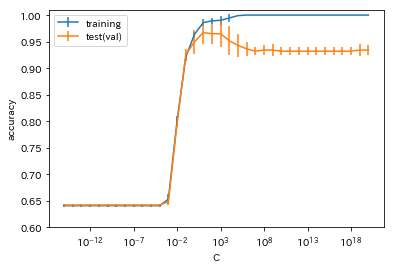

In [19]:
plt.errorbar(gs.cv_results_['param_C'].data,
             gs.cv_results_['mean_train_score'], 
             yerr=gs.cv_results_['std_train_score'],
             label="training")

plt.errorbar(gs.cv_results_['param_C'].data,
             gs.cv_results_['mean_test_score'], 
             yerr=gs.cv_results_['std_test_score'],
             label="test(val)")

plt.ylim(.6, 1.01)
plt.xscale("log") # 10倍づつなので対数グラフへ
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend(loc="best");

`plt.xscale("log")` : 対数グラフにする

[初めてのmatplotlib(対数グラフ)](http://cranethree.hatenablog.com/entry/2015/05/30/173132)

C は正則化項で値が小さいほど正則化が強くなる．

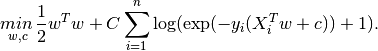

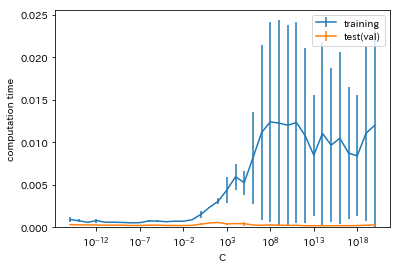

In [20]:
plt.errorbar(gs.cv_results_['param_C'].data, 
             gs.cv_results_['mean_fit_time'], 
             yerr=gs.cv_results_['std_fit_time'],
             label="training")

plt.errorbar(gs.cv_results_['param_C'].data,
             gs.cv_results_['mean_score_time'], 
             yerr=gs.cv_results_['std_score_time'],
             label="test(val)")

plt.ylim(0,)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("computation time")
plt.legend(loc="best");

Cを大きくしすぎると過学習が起こるだけでなく学習時間が長くなる．

In [13]:
from sklearn.svm import SVC

clf = SVC()

C_range_exp = np.arange(-2.0, 5.0)
C_range = 10 ** C_range_exp

param = {'C': C_range,
         'kernel': ['linear', 'rbf']}

gs = GridSearchCV(estimator=clf, param_grid=param, n_jobs=-1, verbose=2, cv=3) # verboseはメセージ（冗長）を表示するかどうか．　０　だと何も表示しない.
# cv=3はデフォルト
gs.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] C=0.01, kernel=linear ...........................................
[CV] C=0.01, kernel=linear ...........................................
[CV] C=0.01, kernel=linear ...........................................
[CV] C=0.01, kernel=rbf ..............................................
[CV] ............................ C=0.01, kernel=linear, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ............................ C=0.01, kernel=linear, total=   0.0s
[CV] ............................ C=0.01, kernel=linear, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ............................... C=0.01, kernel=rbf, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] C=0.1, kernel=linear ............................................
[CV] ............................. C=0.1, kernel=linear, total=   0.0s
[CV] ...........

[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    0.3s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04]), 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [22]:
gs.best_params_, gs.best_score_, gs.best_estimator_

({'C': 100.0, 'kernel': 'rbf'},
 0.97142857142857142,
 SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False))

In [23]:
import pandas as pd
pd.DataFrame(gs.cv_results_).head()

/Users/yohei/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/yohei/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/yohei/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_kernel,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.012134,0.004790,0.769231,0.767041,0.01,linear,"{'C': 0.01, 'kernel': 'linear'}",12,0.769737,0.752475,0.769737,0.788779,0.768212,0.759868,0.003664,0.003135,0.000718,0.015665
1,0.007753,0.005108,0.637363,0.637362,0.01,rbf,"{'C': 0.01, 'kernel': 'rbf'}",14,0.638158,0.636964,0.638158,0.636964,0.635762,0.638158,0.001164,0.002041,0.001128,0.000563
2,0.002815,0.001287,0.949451,0.949449,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",9,0.940789,0.957096,0.953947,0.940594,0.953642,0.950658,0.000140,0.000028,0.006136,0.006791
3,0.009819,0.002991,0.659341,0.662643,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",13,0.664474,0.656766,0.651316,0.673267,0.662252,0.657895,0.005311,0.000165,0.005756,0.007527
4,0.002159,0.001037,0.969231,0.975834,1,linear,"{'C': 1.0, 'kernel': 'linear'}",3,0.953947,0.970297,0.960526,0.990099,0.993377,0.967105,0.000315,0.000116,0.017229,0.010171


In [24]:
a = [gs.cv_results_['param_kernel']== 'linear']
print(gs.cv_results_['param_C'][a].data)
a

[0.01 0.10000000000000001 1.0 10.0 100.0 1000.0 10000.0]


[masked_array(data = [ True False  True False  True False  True False  True False  True False
   True False],
              mask = False,
        fill_value = True)]

In [25]:
a = gs.cv_results_['param_kernel'].data == 'linear'
print(gs.cv_results_['param_C'].data[a])
a

[0.01 0.10000000000000001 1.0 10.0 100.0 1000.0 10000.0]


array([ True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False], dtype=bool)

masked_array には.data  でデータにアクセスできる．

/Users/yohei/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


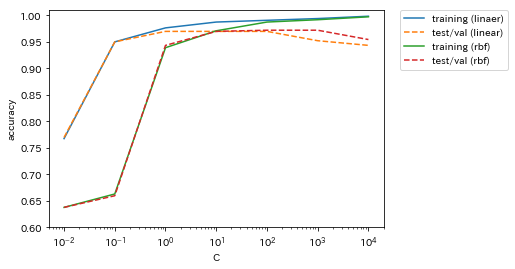

In [26]:
s_linear = [gs.cv_results_['param_kernel']=='linear']

plt.plot(gs.cv_results_['param_C'][s_linear].data, 
         gs.cv_results_['mean_train_score'][s_linear],
         label="training (linaer)")

plt.plot(gs.cv_results_['param_C'][s_linear].data, 
         gs.cv_results_['mean_test_score'][s_linear],
         linestyle="--",
         label="test/val (linear)")


s_rbf = [gs.cv_results_['param_kernel']=='rbf']

plt.plot(gs.cv_results_['param_C'][s_rbf].data, 
         gs.cv_results_['mean_train_score'][s_rbf],
         label="training (rbf)")

plt.plot(gs.cv_results_['param_C'][s_rbf].data, 
         gs.cv_results_['mean_test_score'][s_rbf],
         linestyle="--",
         label="test/val (rbf)")



plt.ylim(.6, 1.01)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



In [27]:
gs.score(X_test, y_test)

0.96491228070175439

In [28]:
SVC(kernel='rbf').gamma

'auto'

`rbf`カーネルには`gamma`というパラメータがあるのでそれについてもグリッドサーチを行う．

In [29]:
from sklearn.svm import SVC

clf = SVC()

C_range_exp = np.arange(-2.0, 10.0)
C_range = 10 ** C_range_exp

gamma_range_exp = np.arange(-10.0, 0.0, 3)
gamma_range = 10 ** gamma_range_exp

param = [ {'C': C_range,
           'kernel': ['linear']},
         
          {'C': C_range,
           'gamma': gamma_range, 
           'kernel': ['rbf']} ]
# linear には gammaというパラメータがない．
# そういう時はparam_grid にディクショナリのリストを渡せば良い．　各ディクショナリに対してグリッドサーチが行われる．

gs = GridSearchCV(clf, param, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV] C=0.01, kernel=linear ...........................................
[CV] C=0.01, kernel=linear ...........................................
[CV] C=0.01, kernel=linear ...........................................
[CV] C=0.1, kernel=linear ............................................
[CV] ............................ C=0.01, kernel=linear, total=   0.0s
[CV] ............................. C=0.1, kernel=linear, total=   0.0s
[CV] ............................ C=0.01, kernel=linear, total=   0.0s
[CV] ............................ C=0.01, kernel=linear, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ............................. C=0.1, kernel=linear, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] C=1.0, kernel=linear ............................................
[CV] ............................. C=0.1, kernel=linear, total=   0.0s
[CV] ..........

[CV] C=10.0, gamma=1e-10, kernel=rbf .................................
[CV] ................... C=1.0, gamma=1e-07, kernel=rbf, total=   0.0s
[CV] C=1.0, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=10.0, gamma=1e-10, kernel=rbf, total=   0.0s
[CV] C=10.0, gamma=1e-07, kernel=rbf .................................
[CV] .................. C=1.0, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1.0, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=10.0, gamma=1e-07, kernel=rbf, total=   0.0s
[CV] C=10.0, gamma=1e-07, kernel=rbf .................................
[CV] .................. C=1.0, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10.0, gamma=0.0001, kernel=rbf ................................
[CV] .................. C=10.0, gamma=1e-07, kernel=rbf, total=   0.0s
[CV] C=10.0, gamma=1e-07, kernel=rbf .................................
[CV] ................. C=10.0, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C

[CV] C=100000.0, gamma=0.1, kernel=rbf ...............................
[CV] ................ C=100000.0, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=100000.0, gamma=0.1, kernel=rbf ...............................
[CV] ................ C=100000.0, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1000000.0, gamma=1e-10, kernel=rbf ............................
[CV] ............... C=10000.0, gamma=1e-10, kernel=rbf, total=   0.0s
[CV] C=10000.0, gamma=1e-07, kernel=rbf ..............................
[CV] .............. C=100000.0, gamma=1e-10, kernel=rbf, total=   0.0s
[CV] C=100000.0, gamma=1e-10, kernel=rbf .............................
[CV] ............. C=1000000.0, gamma=1e-10, kernel=rbf, total=   0.0s
[CV] C=1000000.0, gamma=1e-10, kernel=rbf ............................
[CV] .............. C=100000.0, gamma=1e-10, kernel=rbf, total=   0.0s
[CV] C=100000.0, gamma=1e-07, kernel=rbf .............................
[CV] ............... C=10000.0, gamma=1e-07, kernel=rbf, total=   0.0s
[CV] C

[CV] C=1000000000.0, gamma=0.1, kernel=rbf ...........................
[CV] .......... C=1000000000.0, gamma=1e-10, kernel=rbf, total=   0.0s
[CV] ............ C=1000000000.0, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1000000000.0, gamma=1e-07, kernel=rbf .........................
[CV] .......... C=1000000000.0, gamma=1e-07, kernel=rbf, total=   0.0s
[CV] C=1000000000.0, gamma=1e-07, kernel=rbf .........................
[CV] .......... C=1000000000.0, gamma=1e-07, kernel=rbf, total=   0.0s
[CV] C=1000000000.0, gamma=1e-07, kernel=rbf .........................
[CV] .......... C=1000000000.0, gamma=1e-07, kernel=rbf, total=   0.0s
[CV] C=1000000000.0, gamma=0.0001, kernel=rbf ........................
[CV] ......... C=1000000000.0, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1000000000.0, gamma=0.0001, kernel=rbf ........................
[CV] ......... C=1000000000.0, gamma=0.0001, kernel=rbf, total=   0.0s


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    1.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09]), 'kernel': ['linear']}, {'C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00...), 'gamma': array([  1.00000e-10,   1.00000e-07,   1.00000e-04,   1.00000e-01]), 'kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [30]:
gs.best_params_, gs.best_score_, gs.best_estimator_

({'C': 10.0, 'gamma': 0.10000000000000001, 'kernel': 'rbf'},
 0.97362637362637361,
 SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma=0.10000000000000001,
   kernel='rbf', max_iter=-1, probability=False, random_state=None,
   shrinking=True, tol=0.001, verbose=False))

In [31]:
pd.DataFrame(gs.cv_results_)

/Users/yohei/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/yohei/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/yohei/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,param_kernel,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.007248,0.003567,0.769231,0.767041,0.01,NaN,linear,"{'C': 0.01, 'kernel': 'linear'}",37,0.769737,0.752475,0.769737,0.788779,0.768212,0.759868,0.000042,0.000605,0.000718,0.015665
1,0.003627,0.001559,0.949451,0.949449,0.1,NaN,linear,"{'C': 0.1, 'kernel': 'linear'}",18,0.940789,0.957096,0.953947,0.940594,0.953642,0.950658,0.001124,0.000275,0.006136,0.006791
2,0.002310,0.000965,0.969231,0.975834,1,NaN,linear,"{'C': 1.0, 'kernel': 'linear'}",4,0.953947,0.970297,0.960526,0.990099,0.993377,0.967105,0.000240,0.000051,0.017229,0.010171
3,0.002039,0.000706,0.969231,0.986820,10,NaN,linear,"{'C': 10.0, 'kernel': 'linear'}",4,0.967105,0.986799,0.940789,0.993399,1.000000,0.980263,0.000343,0.000074,0.024206,0.005363
4,0.022222,0.000692,0.969231,0.990117,100,NaN,linear,"{'C': 100.0, 'kernel': 'linear'}",4,0.967105,0.990099,0.947368,0.996700,0.993377,0.983553,0.028110,0.000082,0.018833,0.005367
5,0.015664,0.000722,0.951648,0.993417,1000,NaN,linear,"{'C': 1000.0, 'kernel': 'linear'}",16,0.940789,0.996700,0.914474,1.000000,1.000000,0.983553,0.014628,0.000088,0.035734,0.007104
6,0.014394,0.000615,0.942857,0.997807,10000,NaN,linear,"{'C': 10000.0, 'kernel': 'linear'}",25,0.934211,1.000000,0.914474,1.000000,0.980132,0.993421,0.015915,0.000031,0.027481,0.003101
7,0.106016,0.000724,0.929670,1.000000,100000,NaN,linear,"{'C': 100000.0, 'kernel': 'linear'}",28,0.934211,1.000000,0.914474,1.000000,0.940397,1.000000,0.145219,0.000036,0.011055,0.000000
8,0.111075,0.001019,0.929670,1.000000,1e+06,NaN,linear,"{'C': 1000000.0, 'kernel': 'linear'}",28,0.934211,1.000000,0.914474,1.000000,0.940397,1.000000,0.151867,0.000601,0.011055,0.000000
9,0.114895,0.000656,0.929670,1.000000,1e+07,NaN,linear,"{'C': 10000000.0, 'kernel': 'linear'}",28,0.934211,1.000000,0.914474,1.000000,0.940397,1.000000,0.157440,0.000037,0.011055,0.000000


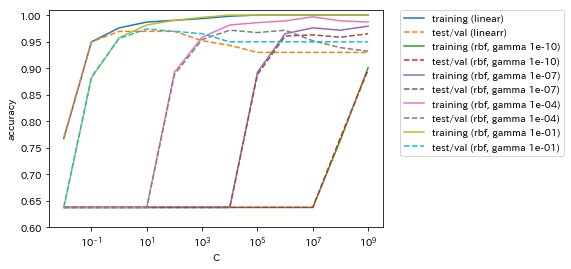

In [49]:
s_linear = [gs.cv_results_['param_kernel']=='linear']

plt.plot(gs.cv_results_['param_C'][s_linear].data, 
         gs.cv_results_['mean_train_score'][s_linear],
         label="training (linear)")

plt.plot(gs.cv_results_['param_C'][s_linear].data, 
         gs.cv_results_['mean_test_score'][s_linear],
         linestyle="--",
         label="test/val (linearr)")





s_rbf = [gs.cv_results_['param_kernel']=='rbf']

for g in gamma_range:
    s_gamma = gs.cv_results_['param_gamma'][s_rbf].data == g # rbf カーネルのうち， gamma == gのものを取り出すためのboolのリスト

    plt.plot(gs.cv_results_['param_C'][s_rbf][s_gamma].data, 
             gs.cv_results_['mean_train_score'][s_rbf][s_gamma],
             label="training (rbf, gamma {0:.0e})".format(g))
    
    plt.plot(gs.cv_results_['param_C'][s_rbf][s_gamma].data, 
             gs.cv_results_['mean_test_score'][s_rbf][s_gamma],
             linestyle="--",
             label="test/val (rbf, gamma {0:.0e})".format(g))

plt.ylim(.6, 1.01)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

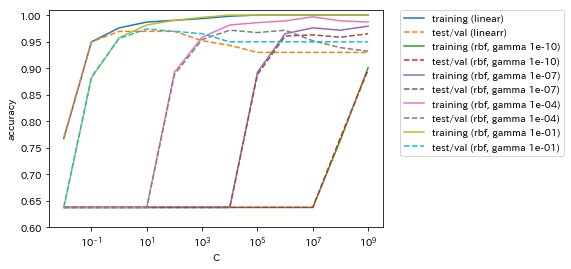

In [48]:
s_linear = [gs.cv_results_['param_kernel']=='linear']

plt.plot(gs.cv_results_['param_C'][s_linear].data, 
         gs.cv_results_['mean_train_score'][s_linear],
         label="training (linear)")

plt.plot(gs.cv_results_['param_C'][s_linear].data, 
         gs.cv_results_['mean_test_score'][s_linear],
         linestyle="--",
         label="test/val (linearr)")





s_rbf = [gs.cv_results_['param_kernel']=='rbf']

for g in gamma_range:
    s_gamma = gs.cv_results_['param_gamma'].data == g #  gamma == gのものを取り出すためのboolのリスト

    plt.plot(gs.cv_results_['param_C'][s_gamma].data, 
             gs.cv_results_['mean_train_score'][s_gamma],
             label="training (rbf, gamma {0:.0e})".format(g))
    
    plt.plot(gs.cv_results_['param_C'][s_gamma].data, 
             gs.cv_results_['mean_test_score'][s_gamma],
             linestyle="--",
             label="test/val (rbf, gamma {0:.0e})".format(g))

plt.ylim(.6, 1.01)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

```python
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
```
判例の位置を座標的に決めるにはbbox_to_anchorオプションを使う。軸領域の左下を（0, 0）、右上を（1, 1）としたときの座標でアンカーを指定する。locを指定するとそのアンカーに対する凡例の位置が決定される．

凡例の領域（axes）と実際に描画される枠線との間には一定の余白をとるようになっているのでborderaxespadをゼロにしないとbbox_to_anchorの座標ぴったりにはならない。

注意) `loc='upper left'` と `loc=2` は同じ意味．
    
以下参考サイト　

[matplotlib - memoring](http://seesaawiki.jp/met-python/d/matplotlib#content_5_16)

[matplotlibで、系列の凡例を枠外に表示する](http://symfoware.blog68.fc2.com/blog-entry-1418.html)

In [50]:
gs.score(X_test, y_test)

0.96491228070175439

RBFカーネルの $\gamma$ は以下の式の $\frac{1}{2\sigma^2}$に相当する．
$$
    K_{\sigma}(\boldsymbol{u}, \boldsymbol{v}) = \exp{\left( - \frac{1}{2\sigma^2} \| \boldsymbol{u} - \boldsymbol{v}\|^2\right)}
$$

$\gamma$が小さければ入力データから遠くのサポートベクトルが識別に寄与し，大きいと近くのサポートベクトルのみが識別に寄与する．

つまり，$\gamma$が小さい場合には，識別面が滑らかになり，大きいと複雑になる．

In [51]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()

In [52]:
param = {'n_neighbors': range(1,20) }

gs = GridSearchCV(clf, param)
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 20)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [53]:
gs.best_params_, gs.best_score_, gs.best_estimator_

({'n_neighbors': 5},
 0.96483516483516485,
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=5, p=2,
            weights='uniform'))

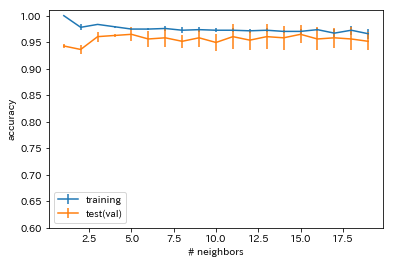

In [32]:
plt.errorbar(gs.cv_results_['param_n_neighbors'].data, 
             gs.cv_results_['mean_train_score'], 
             yerr=gs.cv_results_['std_train_score'],
             label="training")

plt.errorbar(gs.cv_results_['param_n_neighbors'].data,
             gs.cv_results_['mean_test_score'], 
             yerr=gs.cv_results_['std_test_score'],
             label="test(val)")

plt.ylim(.6, 1.01)
plt.xlabel("# neighbors")
plt.ylabel("accuracy")
plt.legend(loc="best");

N=1の時，訓練誤差が０になっているが，これは当たり前．

In [54]:
gs.score(X_test, y_test)

0.95614035087719296

In [32]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(max_iter=2000)
clf

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [33]:
param = {'hidden_layer_sizes': [(10,), (50,), (100,),
                                (10,10,), (50,50,), (100,100,),
                                (10, 5,), (5,5,), (30, 20, 10),
                                (100,1000,50,), (1000,100,50,),
                                (10,10,10), (50,50,50), (100,100,100,),
                                ],
          'activation' : ['identity', 'logistic', 'tanh', 'relu'],
          'beta_1' : [0.9, 0.8, 0.7, 0.6, 0.5],
          'beta_2' : [0.999, 0.9, 0.8, 0.7],
          'alpha' : [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
        }

In [34]:
gs = GridSearchCV(clf, param, n_jobs=-1, verbose=1)
# gs.fit(X_train, y_train)

# # Fitting 3 folds for each of 6720 candidates, totalling 20160 fits

グリドサーチをかけるパラメータの組み合わせ数がとても多く，すぐには終わらない．

そういう時は，RandomizedSearchCVを行う．
GridSearchCVとは対照的に、すべてのパラメータ値が試されるわけではなく、指定されたパラメータからn_iter個のパラメータのセットが試される。試行されるパラメータセットの数は、n_iterによって与えられます。ディクショナリの中身がリストが与えられた場合、その中のものを一様にサンプリングする。


[scikit-learnでモデルのハイパーパラメータチューニングをしよう！](http://qiita.com/ragAgar/items/2f6bebdba5f9d7381310)

[sklearn.model_selection.RandomizedSearchCV ](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

In [35]:
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(clf, param,
                        n_iter=20, 
                        n_jobs=-1, verbose=2)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] hidden_layer_sizes=(50, 50), beta_2=0.999, beta_1=0.7, alpha=0.001, activation=identity 
[CV] hidden_layer_sizes=(50, 50), beta_2=0.999, beta_1=0.7, alpha=0.001, activation=identity 
[CV] hidden_layer_sizes=(50, 50), beta_2=0.999, beta_1=0.7, alpha=0.001, activation=identity 
[CV] hidden_layer_sizes=(50, 50, 50), beta_2=0.9, beta_1=0.9, alpha=1e-05, activation=identity 
[CV]  hidden_layer_sizes=(50, 50), beta_2=0.999, beta_1=0.7, alpha=0.001, activation=identity, total=   0.3s
[CV] hidden_layer_sizes=(50, 50, 50), beta_2=0.9, beta_1=0.9, alpha=1e-05, activation=identity 
[CV]  hidden_layer_sizes=(50, 50, 50), beta_2=0.9, beta_1=0.9, alpha=1e-05, activation=identity, total=   0.4s
[CV] hidden_layer_sizes=(50, 50, 50), beta_2=0.9, beta_1=0.9, alpha=1e-05, activation=identity 
[CV]  hidden_layer_sizes=(50, 50), beta_2=0.999, beta_1=0.7, alpha=0.001, activation=identity, total=   0.5s
[CV] hidden_layer_sizes=(10, 5), beta_2=

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.5s


[CV]  hidden_layer_sizes=(30, 20, 10), beta_2=0.9, beta_1=0.7, alpha=1, activation=tanh, total=   0.7s
[CV] hidden_layer_sizes=(10, 5), beta_2=0.999, beta_1=0.9, alpha=1e-05, activation=identity 
[CV]  hidden_layer_sizes=(10, 5), beta_2=0.999, beta_1=0.9, alpha=1e-05, activation=identity, total=   0.5s
[CV] hidden_layer_sizes=(10, 5), beta_2=0.999, beta_1=0.9, alpha=1e-05, activation=identity 
[CV]  hidden_layer_sizes=(100,), beta_2=0.999, beta_1=0.9, alpha=0.0001, activation=logistic, total=   1.3s
[CV] hidden_layer_sizes=(10, 5), beta_2=0.999, beta_1=0.9, alpha=1e-05, activation=identity 
[CV]  hidden_layer_sizes=(100,), beta_2=0.999, beta_1=0.9, alpha=0.0001, activation=logistic, total=   1.2s
[CV] hidden_layer_sizes=(5, 5), beta_2=0.7, beta_1=0.7, alpha=1e-05, activation=logistic 
[CV]  hidden_layer_sizes=(100,), beta_2=0.999, beta_1=0.9, alpha=0.0001, activation=logistic, total=   1.4s
[CV] hidden_layer_sizes=(5, 5), beta_2=0.7, beta_1=0.7, alpha=1e-05, activation=logistic 
[CV]  

[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   11.8s finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'hidden_layer_sizes': [(10,), (50,), (100,), (10, 10), (50, 50), (100, 100), (10, 5), (5, 5), (30, 20, 10), (100, 1000, 50), (1000, 100, 50), (10, 10, 10), (50, 50, 50), (100, 100, 100)], 'activation': ['identity', 'logistic', 'tanh', 'relu'], 'beta_1': [0.9, 0.8, 0.7, 0.6, 0.5], 'beta_2': [0.999, 0.9, 0.8, 0.7], 'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
          pre_dispatch='2*n_jobs', random_

In [36]:
gs.best_params_, gs.best_score_, gs.best_estimator_

({'activation': 'identity',
  'alpha': 1e-05,
  'beta_1': 0.9,
  'beta_2': 0.9,
  'hidden_layer_sizes': (50, 50, 50)},
 0.9758241758241758,
 MLPClassifier(activation='identity', alpha=1e-05, batch_size='auto',
        beta_1=0.9, beta_2=0.9, early_stopping=False, epsilon=1e-08,
        hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
        learning_rate_init=0.001, max_iter=2000, momentum=0.9,
        nesterovs_momentum=True, power_t=0.5, random_state=None,
        shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
        verbose=False, warm_start=False))

In [37]:
gs.score(X_test, y_test)

0.94736842105263153